In [510]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


## Data Understanding

In [511]:
df.shape

(64461, 61)

<AxesSubplot:>

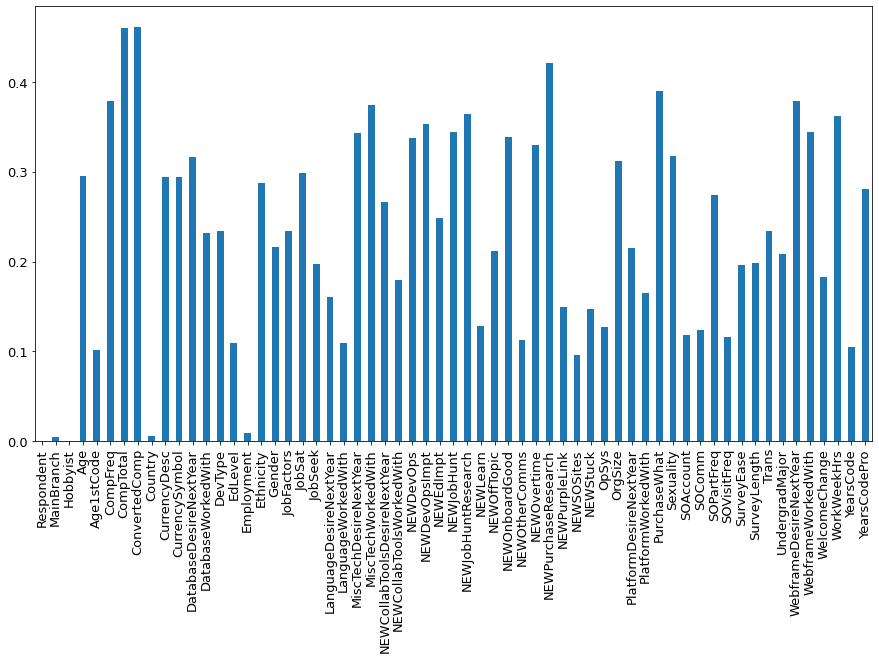

In [512]:
#check missling value ratio per column
df.isnull().mean().plot(kind='bar',figsize=(15, 8),fontsize=13)

As I also did practice data analysis using 2017 survey data before, in comparison, 2020 survey data greatly improved in terms of data quality -- fewer missing value is found in each column this year.

In [513]:
#check columns with most missing values, benchmark set at 45%
most_m_columns = df.columns[df.isnull().mean()>0.45]
most_m_columns

Index(['CompTotal', 'ConvertedComp'], dtype='object')

The highest missing data columns are related to compensation, which is understandble as it is a privacy matter. As no significant missing values are found in any columns. No specific processing is needed.

In [514]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [515]:
#The shcema is long but I am only showing first 30 rows here as illustration.
schema = pd.read_csv('./survey_results_schema.csv')
schema.head(30)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


I am interested in the age data in this survey as I personally think it is a job for young to mid-year professionals. Let's check. But first, let me clean the some age data. 

## Data Processing

In [516]:
df_dream = df[['Age','Age1stCode','YearsCodePro','Employment','Gender']]
df_dream.head()

,Age,Age1stCode,YearsCodePro,Employment,Gender
0,NaN,13,27,"Independent contractor, freelancer, or self-em...",Man
1,NaN,19,4,Employed full-time,NaN
2,NaN,15,NaN,NaN,NaN
3,25.0,18,4,NaN,Man
4,31.0,16,8,Employed full-time,Man


In [517]:
df_dream = df_dream.dropna(subset=('Age','Age1stCode','YearsCodePro','Gender'),how='any')

In [518]:
df_dream['YearsCodePro'].unique()

array(['4', '8', '13', '2', '7', '20', '1', '23', '3', '12', '17', '10',
       '14', '6', '28', '9', '15', '11', '25', 'Less than 1 year', '5',
       '21', '16', '19', '35', '18', '24', '32', '22', '30', '38', '26',
       '40', '27', '31', 'More than 50 years', '33', '34', '29', '36',
       '37', '41', '45', '39', '47', '42', '46', '50', '43', '44', '48',
       '49'], dtype=object)

In [519]:
df_dream['YearsCodePro'].replace(['Less than 1 year'], 0)

3         4
4         8
7        13
8         4
9         4
         ..
64386     3
64411     0
64413     0
64420     0
64427    14
Name: YearsCodePro, Length: 36352, dtype: object

In [520]:
df_dream = df_dream.reset_index(drop=True)

In [521]:
df_dream = df_dream.loc[(df_dream['YearsCodePro']!= 'More than 50 years')&(df_dream['Employment']!='Student')&(df_dream['Age1stCode']!='Younger than 5 years')&(df_dream['Age1stCode']!='Older than 85')]

In [522]:
df_dream['Employment'].value_counts()

Employed full-time                                      31308
Independent contractor, freelancer, or self-employed     3604
Employed part-time                                       1163
Name: Employment, dtype: int64

In [523]:
df_dream['Age1stCode'].unique()

array(['18', '16', '12', '20', '14', '13', '42', '8', '15', '30', '21',
       '10', '46', '9', '7', '6', '19', '17', '11', '25', '31', '29', '5',
       '28', '38', '23', '22', '41', '24', '26', '35', '27', '40', '33',
       '36', '32', '45', '44', '34', '39', '50', '37', '43', '48', '55',
       '49', '47'], dtype=object)

In [524]:
df_dream.dtypes

Age             float64
Age1stCode       object
YearsCodePro     object
Employment       object
Gender           object
dtype: object

In [525]:
df_dream[['Age1stCode','YearsCodePro','Age']] = df_dream[['Age1stCode','YearsCodePro','Age']].astype(int)

ValueError: invalid literal for int() with base 10: 'Less than 1 year'

In [ ]:
df_dream.head()

## Question 1. How long did it take from coding first time to coding professionally?

In [ ]:
df_dream['Yrs_of_Transit'] = df_dream['Age']-df_dream['YearsCodePro']-df_dream['Age1stCode']

In [ ]:
#remove some unresonable outliers
df_dream = df_dream[(df_dream['Yrs_of_Transit']>=0)&(df_dream['Yrs_of_Transit']<=50)]

In [ ]:
#Make a graph showing how many years it took people from coding first time to professionally
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df_dream['Yrs_of_Transit'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=1)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Yrs_of_Transit')
plt.ylabel('Frequency')
plt.title('How many years it took to transit coding dream into career')
plt.text(30, 50, r'$\mu=8.6, sigma=5.4$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [ ]:
df_dream['Yrs_of_Transit'].describe()

It takes about 8 years for the most people transit from coding first time to coding professionally. This insight may be useful for parents/schools when helping kids develop coding interests.

## Question 2. What jobs are respondents doing?  

In [ ]:
df_job = df.DevType.str.split(';').explode().value_counts()/len(df)*100
df_job = df_job.rename_axis('DevType').reset_index(name='Percent')

In [ ]:
plt.figure(figsize=(15,9))
plt.xlabel("Percentage%", size=15)
plt.ylabel("Develop Type", size=15)
plt.title("Ratio of Each Job Category (%)", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
df_sorted_desc= df_job.sort_values('Percent',ascending=True)
df_sorted_desc.set_index('DevType').Percent.plot(kind='barh')

The majority of job families among respondents in this survey is developer. Other than traditional developers, We also see diversity in this survey. There are 6% respondents are Data or Business analysts, and 6% are Data Scientist or Machine Learning specialists. Since I am also one of this job category, I am more interested the data in these two types: 
1. Data or business analyst
2. Data scientist or machine learning specialist.

### I brainstormed some questions I am interested to deep dive about Data Scientist/Data/Business Analyst:
- What were their undergraduate majors in school? 
- What are their education level?
- What % of people codes as a hobby?
- How satisfied about the job? 
- What job factors matter the most?
- How does work life balance look like? 
- What tools do they use?

In [ ]:
ds = df[(df['DevType'].str.contains('Data scientist'))&(df['DevType'].str.contains('Data or business analyst'))]
ds.head()

In [ ]:
ds.shape

## Question 3. What were their undergraduate majors in school?

In [ ]:
df1 = ds['UndergradMajor'].value_counts()/len(ds)*100

df1 = df1.rename_axis('Major').reset_index(name='Percent')
df1

In [ ]:
df2 = df[(df['DevType'].str.contains('Data scientist')==False)&(df['DevType'].str.contains('Data or business analyst')==False)]
df2 = df['UndergradMajor'].value_counts()/len(df)*100

df2 = df2.rename_axis('Major').reset_index(name='Percent')
df2

In [ ]:
#visualize it by concating two group of respondents
pd.concat({
    'DS/DA/BA Respondents': df1.set_index('Major').Percent, 'Other Respondents': df2.set_index('Major').Percent
}, axis=1).plot.bar(figsize=(10,6),fontsize = 14)

There are 13 major options in the survey. Most survey respondents are Computer Science background, but DS/DA/DB respondents are relatively more diverse. Among DS/DA/BA respondents, top five are STEM majors. In top 5, Math/Statistic major respondents have a much higher ratio that went into DS field, meaning that it is a relatively favored major to break into the DS professionally. Followed by that, other non-traditional majors in Data Science include Social Science and Business. 

## Question 4. What are their education level?

In [ ]:
ds = ds.reset_index(drop=True)

In [ ]:
#Cleaning Education name as it is too long for readers
ds['Education'] = ""

for i in range(len(ds['EdLevel'])):
    if ds['EdLevel'][i]=='Some college/university study without earning a degree':
        ds.loc[i,'Education']='College without degrees'
    elif ds['EdLevel'][i]=='Bachelor’s degree (B.A., B.S., B.Eng., etc.)':
        ds.loc[i,'Education']='Bachelor'
    elif ds['EdLevel'][i]=='Other doctoral degree (Ph.D., Ed.D., etc.)':
        ds.loc[i,'Education']='PhD'
    elif ds['EdLevel'][i]=='Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':
        ds.loc[i,'Education']='Master'
    elif ds['EdLevel'][i]=='Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':
        ds.loc[i,'Education']='Secondary'
    elif ds['EdLevel'][i]=='Professional degree (JD, MD, etc.)':
        ds.loc[i,'Education']='Professional/JD/MD'
    elif ds['EdLevel'][i]=='Associate degree (A.A., A.S., etc.)':
        ds.loc[i,'Education']='Associate'
    elif ds['EdLevel'][i]=='I never completed any formal education':
        ds.loc[i,'Education']='No Education'
    elif ds['EdLevel'][i]=='Primary/elementary school':
        ds.loc[i,'Education']='Primary/Elementary'

In [ ]:
ds = ds[ds['Education']!='']

In [ ]:
df3 = ds['Education'].value_counts()/len(ds['Education'])

In [ ]:
df3 = df3.rename_axis('Education').reset_index(name='Percent')
df3

In [ ]:
df4 = df[(df['DevType'].str.contains('Data scientist')==False)&
         (df['DevType'].str.contains('Data or business analyst')==False)&
         (df['EdLevel'].notnull())]

In [ ]:
df4 = df4.reset_index(drop=True)

In [ ]:
df4['Education'] = ""

for i in range(len(df4['EdLevel'])):
    if df4['EdLevel'][i]=='Some college/university study without earning a degree':
        df4.loc[i,'Education']='College without degrees'
    elif df4['EdLevel'][i]=='Bachelor’s degree (B.A., B.S., B.Eng., etc.)':
        df4.loc[i,'Education']='Bachelor'
    elif df4['EdLevel'][i]=='Other doctoral degree (Ph.D., Ed.D., etc.)':
        df4.loc[i,'Education']='PhD'
    elif df4['EdLevel'][i]=='Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':
        df4.loc[i,'Education']='Master'
    elif df4['EdLevel'][i]=='Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':
        df4.loc[i,'Education']='Secondary'
    elif df4['EdLevel'][i]=='Professional degree (JD, MD, etc.)':
        df4.loc[i,'Education']='Professional/JD/MD'
    elif df4['EdLevel'][i]=='Associate degree (A.A., A.S., etc.)':
        df4.loc[i,'Education']='Associate'
    elif df4['EdLevel'][i]=='I never completed any formal education':
        df4.loc[i,'Education']='No Education'
    elif df4['EdLevel'][i]=='Primary/elementary school':
        df4.loc[i,'Education']='Primary/Elementary'   

In [ ]:
df4 = df4['Education'].value_counts()/len(df4['Education'])

In [ ]:
df4 = df4.rename_axis('Education').reset_index(name='Percent')
df4

In [ ]:
#visualize education level results in two groups
pd.concat({
    'DS/DA/BA Respondents': df3.set_index('Education').Percent, 'Other Respondents': df4.set_index('Education').Percent
}, axis=1).plot.bar(figsize=(10,6),fontsize = 14)

It indicates that DS Analytic respondents have a relatively higher ratio of high-education users, including Master and PhD degrees. 

## Question 5. What % of people codes as a hobby? 

In [ ]:
ds['Hobbyist'].value_counts()/len(ds)*100

In [ ]:
ds['Hobbyist'].value_counts()

In [ ]:
df_h = df[(df['DevType'].str.contains('Data scientist')==False)&
         (df['DevType'].str.contains('Data or business analyst')==False)]

df_h['Hobbyist'].value_counts()/len(df_h)*100

In [ ]:
df_h['Hobbyist'].value_counts()

It seems that more users in DS/BA/DA group code as hobby compared to the rest. However, is this difference by accident? In another word, does job category (DS versus others) is associated with this coding hobby? Let's do a hypothesis testing on association using Chi-square method.

The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable. I set the hypothesis as below:

Step1:
- Ho: There is no difference in "coding as a hobby" ratio in each career category ( DS/BA/DA versus The rest).
- Ha: There is a difference in "coding as a hobby" ratio in each career category ( DS/BA/DA versus The rest).

Step2: Choose a significance Level
We choose α = 0.05

Step3: Create Contingency table

Step4: Calculate Expected Frequency

Step5: Calculate the Chi-Square value or Chi-Square Statistic
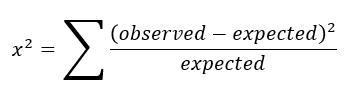

Step6: Calculate degrees of freedom

Step7: Find p-value

Step8: Decide whether to reject or keep our null hypothesis



In [ ]:
df_h1 = ds['Hobbyist'].value_counts()
df_h1 = df_h1.rename_axis('Hobbyist').reset_index(name='Count')

In [ ]:
df_h2 = df_h['Hobbyist'].value_counts()
df_h2 = df_h2.rename_axis('Hobbyist').reset_index(name='Count')

In [ ]:
#Create Contingency table
chi_test = pd.DataFrame(
    [
       list(df_h1['Count']),
       list(df_h2['Count'])
    ],
    index=["DS/DA/BA","Others"],
    columns=["Yes","No"])
chi_test

In [ ]:
#Thankfully we can get this chi square oupput with one line of code
from scipy.stats import chi2_contingency
chi2_contingency(chi_test)

In [ ]:
#to print a clean output summary
print('Chi square is '+str(chi2_contingency(chi_test)[0]) + ', P-value is '+ str(chi2_contingency(chi_test)[1]))

The P-value is 0.00275078721546433, which is smaller than our critial value 0.05. It says that the possibility of getting a chi-square value at least 8.96580996596258 is very small. 

So, we reject the null hypothesis and conclude that there is a difference between DS respondents and the rest respondents regarding if they code as a hobby statistically significance. 

Personal interest is a key charateristic for a Data Scientist or Business/Data Analyst. The metric we used to examine this statement is to compare the coding as hobby ratio among DS/DA group and other respondents. The statistic method we used is chi-square hypothesis testing.

In [ ]:
df_h3 = ds['Hobbyist'].value_counts()/len(ds)*100
df_h3 = df_h3.rename_axis('Hobbyist').reset_index(name='Percent')

In [ ]:
df_h4 = df_h['Hobbyist'].value_counts()/len(df_h)*100
df_h4 = df_h4.rename_axis('Hobbyist').reset_index(name='Percent')

In [ ]:
pd.concat({
    'DS/DA/BA Respondents': df_h3.set_index('Hobbyist').Percent, 'Other Respondents': df_h4.set_index('Hobbyist').Percent
}, axis=1).plot.bar(figsize=(10,6),fontsize = 14)

## Question 6. How satisfied about the job?

In [ ]:
df_s1 = ds['JobSat'].value_counts()/len(ds)*100
df_s1 = df_s1.rename_axis('JobSat').reset_index(name='Percent')

In [ ]:
list(df_s1['JobSat'])

In [ ]:
df_s2 = df['JobSat'].value_counts()/len(df)*100
df_s2 = df_s2.rename_axis('JobSat').reset_index(name='Percent')

In [ ]:
pd.concat({
    'DS/DA/BA Respondents': df_s1.set_index('JobSat').Percent, 'Other Respondents': df_s2.set_index('JobSat').Percent
}, axis=1).plot.bar(title="Job Satisfaction by Percentage%",figsize=(10,6),fontsize = 14)
plt.xlabel("Satisfaction Level",fontsize = 14)
plt.ylabel("% of Group",fontsize = 14)

We see a higher ratio of professionals in DS/DA/BA job family are satisfied with their jobs compared to other respondents.

## Question 7. What job factors matter the most? 

In [ ]:
# Get possible answers for 'JobFactors'
ds_rank = ds.JobFactors.str.split(';').explode().value_counts()/len(ds)*100
ds_rank = ds_rank.rename_axis('JobFactors').reset_index(name='Percent')
ds_rank

Top 3 factors for DS/DA/BA professionals are below. It is useful for employers to consider when hiring such roles! 
1. Opportunities for professional development
2. Flex time or a flexible schedule
3. Office environment/company culture

In [ ]:
#Check other respondents job factors
df = pd.read_csv('./survey_results_public.csv')
df = df[(df['DevType'].str.contains('Data scientist')==False)&
         (df['DevType'].str.contains('Data or business analyst')==False)]
df_rank1 = df.JobFactors.str.split(';').explode().value_counts()/len(df)*100

df_rank1 = df_rank1.rename_axis('JobFactors').reset_index(name='Percent')
df_rank1

Among the top 3 factors for other repondent, two of them are same as DS/BA/DA respondents' ranking. However, other respondents value the language/technologies the most. In comparison, career development opportunity is not the first priority to them.

1. Languages, frameworks, and other technologies I’d be working with
2. Office environment or company culture
3. Flex time or a flexible schedule 

In [ ]:
pd.concat({
    'DS/DA/BA Respondents': ds_rank.set_index('JobFactors').Percent, 'Other Respondents': df_rank1.set_index('JobFactors').Percent
}, axis=1).plot.bar(title="Job Factors by Percentage%",figsize=(10,6),fontsize = 14)
plt.xlabel("JobFactors",fontsize = 14)
plt.ylabel("% of Group",fontsize = 14)

The biggest difference between the two group is "Language/Framework/Technologies". I guess that's because the traditional developers are exposed to a larger range of toolbox they use, and they are expected to be the expert in their specific area. However, DS/BA/DA professionals have relatively similiar tools they use to analyze, which we can dig deeper on tools in next questions.

## Question 7. What tools do they use and will learn next year?

In [ ]:
# Check the tools DS/DA/BA use
ds_tool = ds.MiscTechWorkedWith.str.split(';').explode().value_counts()/len(ds)*100
ds_tool = ds_tool.rename_axis('MiscTechWorkedWith').reset_index(name='Percent')
ds_tool

In [ ]:
#Check the tools other respondents use
df_tool = df.MiscTechWorkedWith.str.split(';').explode().value_counts()/len(df)*100

df_tool = df_tool.rename_axis('MiscTechWorkedWith').reset_index(name='Percent')
df_tool

In [ ]:
pd.concat({
    'DS/DA/BA Respondents': ds_tool.set_index('MiscTechWorkedWith').Percent, 'Other Respondents': df_tool.set_index('MiscTechWorkedWith').Percent
}, axis=1).plot.bar(title="Frameworks/libraries/tools Use Ratio%",figsize=(15,8),fontsize = 14)
plt.xlabel("Frameworks/libraries/tools",fontsize = 14)
plt.ylabel("% of Group",fontsize = 14)

It shows that Pandas and TensorFlow are popular tools that Data Scientist & Data/Business Analyst use, which makes sense as these tools support their data analysis and machine learning work well. Another big variances exist in Keras, Apache Spark, Hadoop, Torch/PyTorch, which are used to handle big data or natual language processing, heavily used in Data Science field. 

Meanwhile, we notice that Node.js and .Net and .NET Core are favored by other respondents. 

In [ ]:
ds.MiscTechDesireNextYear.str.split(';').explode().value_counts().plot(kind='bar',figsize=(15,8),fontsize = 14)

For next year, a lot of users in DS responded that they would learn Torch/PyTorch, which was ranked 9th in their current used tools. This is an important note to whoever wants to catch up with the technologies in the industry.

## Insignts Recap
1. There are a number of people who attempted to code 8 years before they professionally become a developer - momentums and persistence are keys to sccucess.
2. The majority of StackoverFlow survey respondents in 2020 are traditional developers. There is about 6% respondents are data scientist/Business Analyst/Data Analyst. 
3. Most survey respondents are Computer Science background, but DS/DA/DB respondents are relatively more diverse. Math/Statistic major is a favored major in data scientist/Business Analyst/Data Analyst professions, followed by CS majors.
4. Compared to other respondents, DS respondents have a relatively higher ratio of high-education professionals, including Master and PhD degrees.
5. We conclude that there is a difference between DS respondents and the rest respondents regarding if they code as a hobby, tested with statistically significance.
6. DS/DA/BA job family are relatively happy with their jobs.
7. DS/DA/BA professionals mainly use big data analysis and machine learning tools (with Python) while other respondents create JavaScript code primarily. Next year, a learning trend towards Torch/PyTorch is surging among DS/DA/BA professionals. 